In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [139]:
data = []
labels = []
classes = 3 
cur_path = os.getcwd() 
cur_path

'c:\\Users\\HoPhucTrang\\Desktop\\Intership_TMA\\Task\\middle'

In [140]:
import cv2

In [141]:
for i in range(classes): 
    path = os. path.join(cur_path,'train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        image = cv2.imread(str(path + '/' + a)) 
        image = cv2.resize(image, (180,180)) 
        # image = np.array(image)
        data.append(image) 
        labels.append(i) 

In [142]:
len(data)

1124

In [143]:
len(labels)

1124

In [144]:
data[0].shape

(180, 180, 3)

In [120]:
data[0]

array([[[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       ...,

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]]

In [146]:
data = np.array(data)
labels = np.array(labels)

In [147]:
len(data)

1124

In [123]:
data[0]

array([[[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       ...,

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]],

       [[247, 219, 154],
        [247, 219, 154],
        [247, 219, 154],
        ...,
        [247, 219, 154],
        [247, 219, 154],
        [247, 219, 154]]

In [148]:
#Splitting training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
# validation_data 20% ./

In [149]:
len(X_train)

899

In [150]:
X_train.shape

(899, 180, 180, 3)

In [151]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)

In [152]:
input= X_train.shape[1:]
input

(180, 180, 3)

In [153]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=input))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))

In [154]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Dự đoán của bạn là đúng, việc chia một hình ảnh cho 255 chỉ đơn giản là thay đổi tỷ lệ hình ảnh từ 0-255 thành 0-1. (Chuyển đổi nó thành float từ int cũng giúp cho việc tính toán thuận tiện hơn) Tuy nhiên, không bắt buộc

## Regular data

In [157]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=8, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/15
113/113 [==============================] - 278s 2s/step - loss: 0.9671 - accuracy: 0.5061 - val_loss: 1.0309 - val_accuracy: 0.4800
Epoch 2/15
113/113 [==============================] - 260s 2s/step - loss: 0.9281 - accuracy: 0.5184 - val_loss: 0.7105 - val_accuracy: 0.6889
Epoch 3/15
113/113 [==============================] - 257s 2s/step - loss: 0.6948 - accuracy: 0.7175 - val_loss: 0.5003 - val_accuracy: 0.7822
Epoch 4/15
113/113 [==============================] - 245s 2s/step - loss: 0.3719 - accuracy: 0.8521 - val_loss: 0.2513 - val_accuracy: 0.9156
Epoch 5/15
113/113 [==============================] - 243s 2s/step - loss: 0.3184 - accuracy: 0.9021 - val_loss: 0.2251 - val_accuracy: 0.9511
Epoch 6/15
113/113 [==============================] - 244s 2s/step - loss: 0.1369 - accuracy: 0.9422 - val_loss: 0.1053 - val_accuracy: 0.9689
Epoch 7/15
113/113 [==============================] - 244s 2s/step - loss: 0.1529 - accuracy: 0.9499 - val_loss: 0.1343 - val_accuracy: 0.9733

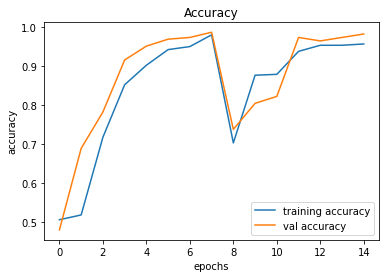

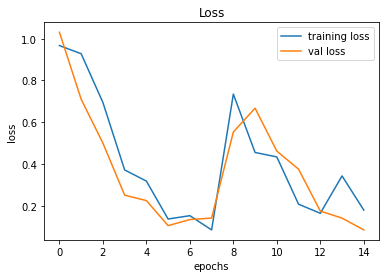

In [158]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [173]:
model.evaluate(X_val,y_val)

8/8 [==============================] - 17s 2s/step - loss: 0.0848 - accuracy: 0.9822


[0.08483041822910309, 0.9822221994400024]

In [175]:
data_test = []
labels_test = []
for i in range(classes): 
    path = os. path.join(cur_path,'test', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        image = cv2.imread(str(path + '/' + a)) 
        image = cv2.resize(image, (180,180)) 
        # image = np.array(image)
        data_test.append(image) 
        labels_test.append(i) 

In [176]:
data_test = np.array(data_test)
labels_test = np.array(labels_test)

In [178]:
y_pred = model.predict(data_test)

8/8 [==============================] - 18s 2s/step


In [179]:
y_pred

array([[1.00000000e+00, 4.56870787e-29, 3.34646050e-33],
       [1.00000000e+00, 6.34019399e-21, 1.26567567e-17],
       [1.00000000e+00, 1.33083763e-15, 1.67166492e-16],
       [9.99999881e-01, 2.94351583e-08, 1.70918014e-07],
       [1.00000000e+00, 1.35355013e-22, 5.78760745e-21],
       [9.99992728e-01, 1.29787907e-07, 7.15230817e-06],
       [1.00000000e+00, 7.53076107e-32, 8.52593012e-30],
       [2.01624945e-01, 4.36761230e-02, 7.54698932e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.12022955e-18, 1.31176123e-21],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.60000908e-01, 1.39592424e-01, 4.06678882e-04],
       [1.00000000e+00, 5.04652625e-26, 2.07326301e-27],
       [1.00000000e+00, 2.80423045e-35, 1.24291236e-29],
       [9.99449193e-01, 6.05387686e-05, 4.90303501e-04],
       [1.00000000e+00, 1.04929646e-20, 4.31805001e-28],
       [1.00000000e+00, 1.74176125e-31, 0.00000000e+00],
       [1.00000000e+00, 0.00000

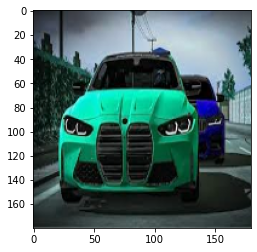

In [189]:
plt.imshow(data_test[82])

In [190]:
score = tf.nn.softmax(y_pred[82])
score

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.21194157, 0.5761169 , 0.21194157], dtype=float32)>

In [191]:
np.argmax(score)

1

In [193]:
labels_test[82]

1

In [194]:
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2],
      dtype=int64)

In [195]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, classes_x))
# 0.9540775930324624 Acc

0.8375


In [196]:
model.save('bus-car-moto-normaldata.h5')#to save

In [199]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(labels_test, classes_x)
conf

array([[67,  6,  7],
       [11, 59, 10],
       [ 2,  3, 75]], dtype=int64)

In [205]:
len(classes_x)

240

In [207]:
print('Acc from confusion matrix: ', (conf[0][0] + conf[1][1] + conf[2][2])/len(classes_x))

Acc from confusion matrix:  0.8375


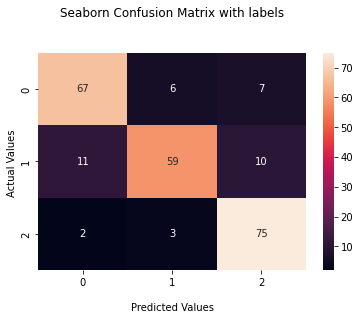

In [218]:
import seaborn as sns
f = sns.heatmap(conf, annot=True, fmt='d')
f.set_title('Seaborn Confusion Matrix with labels\n\n');
f.set_xlabel('\nPredicted Values')
f.set_ylabel('Actual Values ');
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


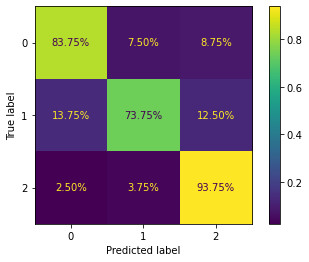

In [212]:
from sklearn.metrics import plot_confusion_matrix
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
plot_confusion_matrix(IC, classes_x, labels_test, normalize='true', values_format='.2%')

In [220]:
0.8375 * 80

67.0

## -----------------------------------&------------------------------------

##  Augmentation Data

In [373]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=125)

In [387]:
i = 0
for batch in datagen.flow_from_directory(directory='bus', 
                                         batch_size=128,  
                                         target_size=(180, 180),
                                         color_mode="rgb",
                                         save_to_dir='Augmented_datatrain/0/', 
                                         save_prefix='aug', 
                                         save_format='jpg'):
    i += 1
    if i > 10:
        break 

Found 400 images belonging to 1 classes.


In [388]:
i = 0
for batch in datagen.flow_from_directory(directory='car', 
                                         batch_size=128,  
                                         target_size=(180, 180),
                                         color_mode="rgb",
                                         save_to_dir='Augmented_datatrain/1/', 
                                         save_prefix='aug', 
                                         save_format='jpg'):
    i += 1
    if i > 10:
        break 

Found 324 images belonging to 1 classes.


In [389]:
i = 0
for batch in datagen.flow_from_directory(directory='moto', 
                                         batch_size=128,  
                                         target_size=(180, 180),
                                         color_mode="rgb",
                                         save_to_dir='Augmented_datatrain/2/', 
                                         save_prefix='aug', 
                                         save_format='jpg'):
    i += 1
    if i > 10:
        break 

Found 400 images belonging to 1 classes.


## Begin traning
## >> Compare performance with model traned on regular dataset 

In [390]:
data = []
labels = []
classes = 3 
cur_path = os.getcwd() 
cur_path

'c:\\Users\\HoPhucTrang\\Desktop\\Intership_TMA\\Task\\middle'

In [391]:
for i in range(classes): 
    path = os. path.join(cur_path,'Augmented_datatrain', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        image = cv2.imread(str(path + '/' + a)) 
        image = cv2.resize(image, (180,180)) 
        # image = np.array(image)
        data.append(image) 
        labels.append(i) 

In [392]:
data = np.array(data)
labels = np.array(labels)

In [393]:
len(data)

3596

In [394]:
#Splitting training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
# validation_data 20% ./

In [395]:
print(X_train.shape)
print(X_val.shape)

(2876, 180, 180, 3)
(720, 180, 180, 3)


In [396]:
y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)

In [397]:
input= X_train.shape[1:]
input

(180, 180, 3)

In [398]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=input))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))

In [399]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=8, epochs=epochs, validation_data=(X_val, y_val))